# Data Preproccesing

## Import Modules =========================================================================

**Importing** these necessary modules is a first step in this phase of preprocessing. 
They are used later to 
plot graphs,
compute complex mathematical equations and 
organize data.

In [89]:
import preprocessing
import model
import imports
from preprocessing import check_integrity

## Fetch Data =========================================================================

Fetch data for **preprocessing** and display it.

In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
downloaded = drive.CreateFile({'id':"1_pLP6m_qHm6kSc1KiNzHaQ1FjGNIWQ3B"})   # replace the id with id of file you want to access
downloaded.GetContentFile('bank-additional-full.csv')

In [18]:
data = pd.read_csv('bank-additional-full.csv', sep=';'  , engine='python')

In [ ]:
data.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27953,32,admin.,single,university.degree,no,yes,no,cellular,mar,mon,364,3,999,0,nonexistent,-1.8,92.843,-50.0,1.520,5099.1,yes
41098,29,student,single,high.school,no,yes,yes,cellular,nov,thu,289,1,3,3,success,-1.1,94.767,-50.8,1.050,4963.6,yes
35585,38,admin.,single,university.degree,no,yes,no,cellular,may,mon,98,5,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no


## Check Data Integrity =========================================================================

Here data is checked for appropriate entries. For example sometimes numbers  are entered as both **integer data** types and **string** data types. 

In [19]:
data=data.drop_duplicates()

True

In [20]:
check_integrity(data)

age
Has 0 missing values
int64
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
Has 0 missing values
object
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
Has 0 missing values
object
['married' 'single' 'divorced' 'unknown']
education
Has 0 missing values
object
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
Has 0 missing values
object
['no' 'unknown' 'yes']
housing
Has 0 missing values
object
['no' 'yes' 'unknown']
loan
Has 0 missing values
object
['no' 'yes' 'unknown']
contact
Has 0 missing values
object
['telephone' 'cellular']
month
Has 0 missing values
object
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar'

## Detecting Outliers =========================================================================


### Define Functions

**Function** used to clean data.

In [21]:
from preprocessing import clean

### Start Cleaning
Feature that are only non-catagorical are ` cleaned ` for **outliers**. 

First the ` campaign ` feature is displayed.It can seen that it **oultliers** are present at final section of the list. 

#### Clean`  Campaign `

Capture column before cleaning to observe change via plot.

In [22]:
campaign_before_clean=data.campaign


Clean ` campaign `

In [44]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,yes,2010
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,no,2010
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,no,2010
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,yes,2010


In [45]:
data= clean(data,"campaign",False)

1.0    17642
2.0    10570
3.0     5341
5.0     4984
4.0     2651
Name: campaign, dtype: int64
1.0    17642
2.0    10570
3.0     5341
5.0     4984
4.0     2651
Name: campaign, dtype: int64
Change in target variable is from  11.26541711178013%  to  11.26541711178013%


Draw ` plot ` to see change in values.

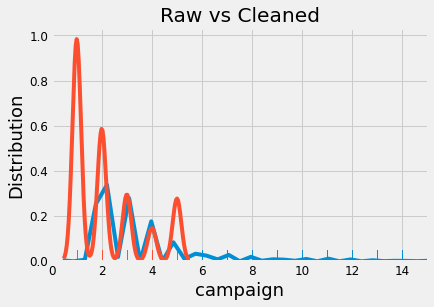

<Figure size 432x288 with 0 Axes>

In [25]:
sns.distplot(campaign_before_clean, hist=False, rug=True)
sns.distplot(data.campaign, hist=False, rug=True)
plt.xlim(0, 15)
plt.xlabel('campaign', fontsize=18)
plt.ylabel('Distribution', fontsize=18)
plt.title("Raw vs Cleaned")
fig = plt.figure()

#### Clean ` Duration `

Box plot before cleaning ` duration `

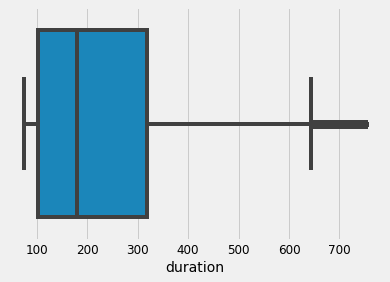

In [46]:
sns.boxplot(x=data['duration'])

Box plot after cleaning ` duration `

75.00     6314
752.65    2060
90.00      170
85.00      170
136.00     168
          ... 
694.00       4
708.00       3
737.00       3
752.00       2
751.00       2
Name: duration, Length: 679, dtype: int64
75.0000     6314
752.4225    2060
85.0000      170
90.0000      170
136.0000     168
            ... 
694.0000       4
708.0000       3
737.0000       3
752.0000       2
751.0000       2
Name: duration, Length: 679, dtype: int64
Change in target variable is from  11.26541711178013%  to  11.26541711178013%


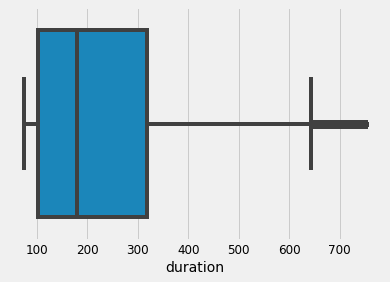

In [47]:
data= clean(data,"duration",False,high=.95)
sns.boxplot(x=data['duration'])

#### Clean Consumer Price Index

The data seems without outliers.

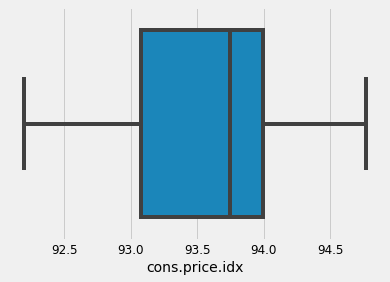

In [28]:
sns.boxplot(x=data['cons.price.idx']) ###inflation and deflation

#### Clean Consumer Confidence Index

Box plot before cleaning ` cons.conf.idx `The data seems with little outliers.

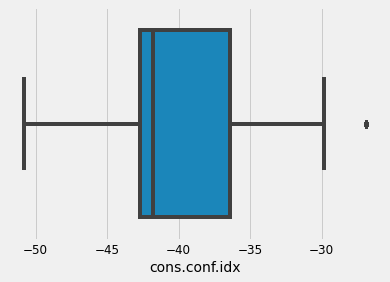

In [29]:
sns.boxplot(x=data['cons.conf.idx']) 

In [30]:
data1=data.copy()
data1= clean(data1,"cons.conf.idx",False,high=1)

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64
-46.2    8866
-36.4    7763
-42.7    6685
-36.1    5175
-41.8    4374
-42.0    3616
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-33.6     178
-34.6     174
-33.0     172
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64
Change in target variable is from  11.26541711178013%  to  11.26541711178013%


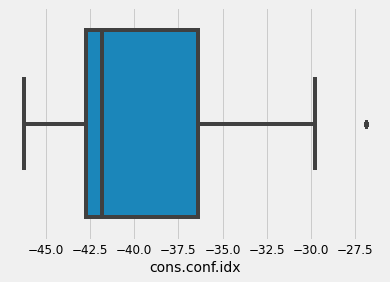

In [31]:
sns.boxplot(x=data1['cons.conf.idx']) ###where is economy heading considered lagging

#### Clean Euribor



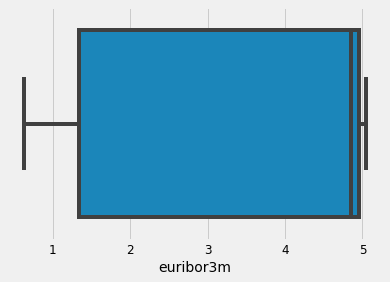

In [32]:
sns.boxplot(x=data['euribor3m'])

No need to clean ` euribor3m `.

#### Clean Number of Employees

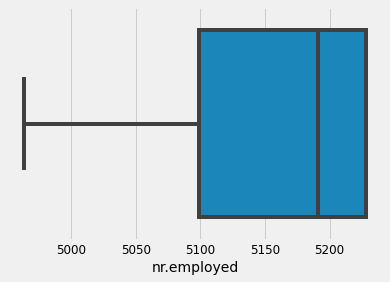

In [33]:
sns.boxplot(x=data['nr.employed'])

Change to ` scatter ` plot for better visualization.

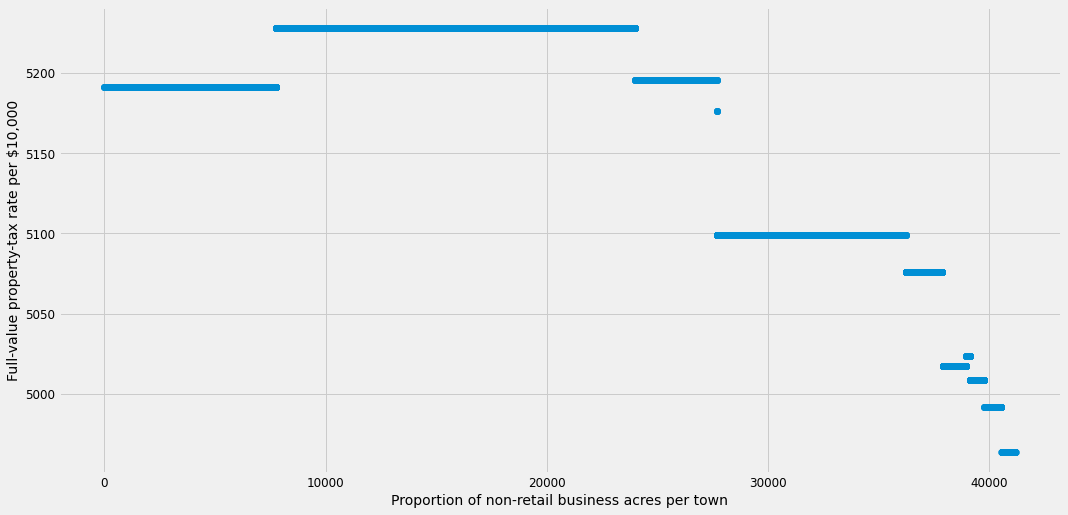

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( data.index,data['nr.employed'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Now that we see the outliers ,we can ` clean `  them.

In [35]:
data= clean(data,"nr.employed",False,low=.15)

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64
5228.1    16234
5099.1    13498
5191.0     7763
5195.8     3683
5176.3       10
Name: nr.employed, dtype: int64
Change in target variable is from  11.26541711178013%  to  11.26541711178013%


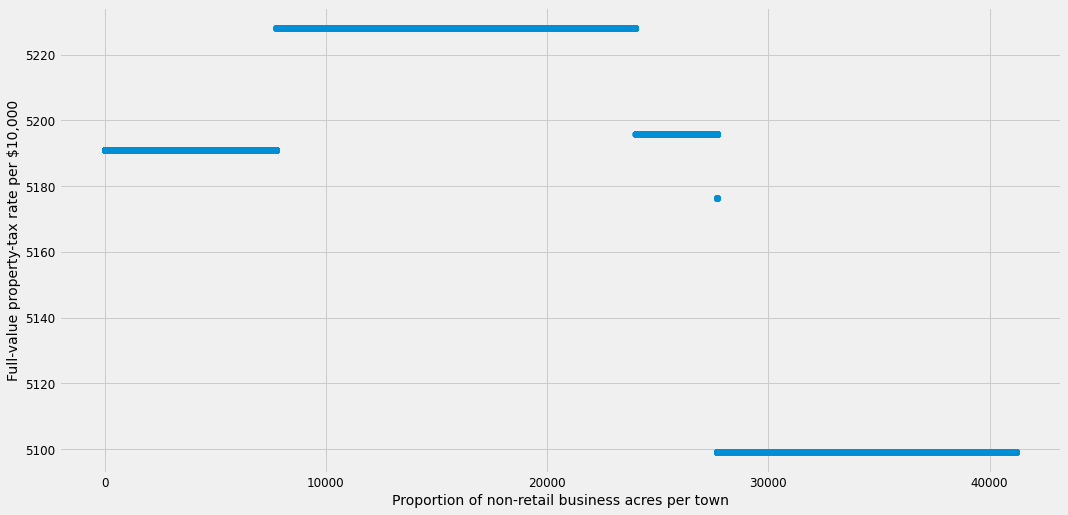

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( data.index,data['nr.employed'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [37]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,245.968680,2.193090,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5175.931208
std,10.42125,188.980641,1.366482,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,55.546297
min,17.00000,75.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,5099.100000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,752.650000,5.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Add year as a feature to further improve model

In [48]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,yes,2010
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,no,2010
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,no,2010
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,5099.1,yes,2010


In [39]:
months=data['month'].values
print(months)
import numpy as np

['may' 'may' 'may' ... 'nov' 'nov' 'nov']


In [40]:
import numpy 
year =[2008]
year = numpy.array(year) 
len(months)

41188

In [41]:
month=dict([('jan', 1),('feb', 2),('mar', 3),('apr', 4),('may', 5),
                ('jun', 6),('jul', 7),('aug', 8),('sep', 9),('oct', 10),('nov', 11),('dec', 12),('kl', 12)])


for  m in range(1,(len(months))):
   
    if((m==41188)):
        m=41188
    mon=month[months[m]]
    prev_mon=month[months[(m-1)]]
   
    if(prev_mon > mon):
       
       year = np.append(year, (year[len(year)-1]+1))
    else :
      # print (str(mon)+str(nxt_mon))
       year = np.append(year, (year[len(year)-1]))
        

len(year)

41188

In [42]:
data['year']=year
data['year']

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
41183    2010
41184    2010
41185    2010
41186    2010
41187    2010
Name: year, Length: 41188, dtype: int64

#### Finally save file as .csv

In [43]:
data.to_csv('cleaned.csv', index=True)

# Modelling

## Encode categorical variables =========================================================================


**Function** used to encode data data.The objective of this function is to take the column names iteratively and encode the  features using ` One hot Encoding `mechanism and also adding the encoded feature  to the respective dataframe.

In [88]:
from model import OneHotEncoder


Define catagorical columns.

In [53]:
categorical_cols= ['job','marital','education',
                                         'default','loan','housing','contact',
                                         'month','day_of_week','poutcome']

` Encode `

In [54]:
OneHotEncoder(categorical_cols, data)

# Drop the categorical features as the one hot encoded representation is present
data = data.drop(categorical_cols, axis=1)

print("Shape of data: ", data.shape)


Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  loan
Encoding for feature:  housing
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of data:  (41188, 65)


In [55]:
data.sample(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
14562,34,182.0,1.0,999,0,1.4,93.918,-42.7,4.961,5228.1,no,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38899,66,525.0,3.0,999,0,-3.4,92.649,-30.1,0.715,5099.1,yes,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8007,58,282.0,5.0,999,0,1.4,94.465,-41.8,4.865,5228.1,no,2008,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


## Logistic Regression Model =========================================================================


### 1.` Normal ` Logistic Regression

` Duration ` will be droped because of its huge impact and since its mot known beforehand.Also **PCA** decomposition is at play here.

In [56]:
columnTransformer = ColumnTransformer([
                                       ('drop_columns' , 'drop', ['duration']),
                                       ('scaler', StandardScaler(),
                                        ['age','pdays','previous','emp.var.rate','cons.price.idx',
                                         'cons.conf.idx','euribor3m','nr.employed','year']),
                                       ], 
                                      remainder='passthrough')
pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()

Create ` pipeline `

In [64]:
normal_pipeline_logistic=Pipeline([("preprocessing", columnTransformer),
                     ('pca3',pca),
                     ('logistic',logistic)])

Split ` data ` and ` fit ` into model.

In [ ]:
data

In [61]:
target = data['y']
features = data.drop(['y'], axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)


In [62]:
pipeline_logistic.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['duration']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'pdays', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                    

Make ` predicition ` and test ` accuracy `.

In [65]:
y_pred = normal_pipeline_logistic.predict(X_test)
accuracy_score(y_test, y_pred)

0.8963340616654528

### 2.` Grid Search ` Logistic Regression

Obtaining tthe optimal values of model hyperparameters. We then can search for the best **model**.

First create ` parameters `.

In [66]:
from sklearn.model_selection import GridSearchCV
X=X_train
n_components = list(range(1,X.shape[1]+1,1))
    # Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)
    # Create a list of options for the regularization penalty
penalty = ['l1', 'l2']
    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(#pca__n_components=n_components,
                      logistic__C=C,
                      logistic__penalty=penalty)

Then search for the ` best-model `

In [68]:
search= GridSearchCV(pipeline_logistic, param_grid=parameters, cv=5,n_jobs=-1,return_train_score=True )
logistic_grid=search.fit(X_train,y_train)

In [69]:
logistic_grid.best_score_

0.9018816388467374

Make ` predicition ` and test ` accuracy `.

In [72]:
y_pred = logistic_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8974265598446225

## XGBoost Model =========================================================================

Creaate **XGBOOST** model and feed into pipeline.

In [77]:
model = xgboost.XGBClassifier()
pipeline_xgboost=Pipeline([("preprocessing", columnTransformer),
                     ('pca3',pca),
                     ('xgboost',model)])

Then train model

In [79]:
pipeline_xgboost=pipeline_xgboost.fit(X_train,y_train)

In [103]:
y_pred = pipeline_xgboost.predict(X_test)
accuracy_score(y_test, y_pred)

0.896698227725176

## Multilayer Perceptron Model =========================================================================

Create model first as always and then fit into model.

In [100]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10, alpha=0.0001,
                     solver='sgd',   random_state=21,tol=0.000000001)


pipeline_mlp=Pipeline([("preprocessing", columnTransformer),
                     ('pca3',pca),
                     ('MLP',clf)])

In [101]:
pipeline_mlp=pipeline_mlp.fit(X_train,y_train)


Fit and test for accuracy.

In [106]:
y_pred = pipeline_mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.8964554503520272

# Cross-validation

Finally we can compare our models and take the one with highest accuracy.

In [95]:
from model import validator

ImportError: ignored

In [109]:
def cross_validator (model,stratified=False):
  
  target = data['y']
  features = data.drop(['y'], axis=1)
  if(stratified):
    kfold = StratifiedKFold(n_splits=5, random_state=7)
  else:
    kfold= KFold(n_splits=5, random_state=7)

  results = cross_val_score(model, features, target, cv=kfold)
  print("Accuracy: %.4f%% (%.4f%%)" % (results.mean()*100, results.std()*100))
  return (results.mean()*100, results.std()*100)

In [112]:
models=[normal_pipeline_logistic,pipeline_xgboost,pipeline_mlp,logistic_grid]

In [122]:
k_fold = {} 
for i in models:
  k_fold[i] = cross_validator(i) 
print ("Resultant dictionary is : " +  str(k_fold)) 

Accuracy: 88.9138% (9.7673%)
Accuracy: 75.9738% (24.1238%)
Accuracy: 88.7390% (10.1237%)
Accuracy: 88.7341% (10.1236%)
Resultant dictionary is : {Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['duration']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'pdays', 'previous',
                                                   'emp.var.rate',
                        

In [114]:
stratified = {} 
for i in models:
  res[i] = cross_validator(i,True) 
print ("Resultant dictionary is : " +  str(res)) 

Accuracy: 60.0360% (24.1158%)
Accuracy: 51.6155% (30.9456%)
Accuracy: 82.7615% (12.2143%)
Accuracy: 84.2524% (8.9648%)
Resultant dictionary is : {Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['duration']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'pdays', 'previous',
                                                   'emp.var.rate',
                        

It can be seen that  **k-fold** performs more than **stratified k-fold.**

**Stratified K-fold**

In [119]:
print("normal_pipeline_logistic"+str(res[normal_pipeline_logistic]))
print("pipeline_xgboost"+str(res[pipeline_xgboost]))
print("pipeline_mlp"+str(res[pipeline_mlp]))
print("logistic_grid"+str(res[logistic_grid]))

normal_pipeline_logistic(60.03604464403847, 24.115796928752104)
pipeline_xgboost(51.615503479509364, 30.945619843927748)
pipeline_mlp(82.76152998730879, 12.214256110786234)
logistic_grid(84.25236844992942, 8.96483909067854)


**K-Fold**

In [123]:
print("normal_pipeline_logistic"+str(k_fold[normal_pipeline_logistic]))
print("pipeline_xgboost"+str(k_fold[pipeline_xgboost]))
print("pipeline_mlp"+str(k_fold[pipeline_mlp]))
print("logistic_grid"+str(k_fold[logistic_grid]))

normal_pipeline_logistic(88.91378951016063, 9.767321524577513)
pipeline_xgboost(75.97378971117332, 24.123822694730684)
pipeline_mlp(88.7389685802104, 10.12369390339941)
logistic_grid(88.73411244326735, 10.123596236365099)
